<a href="https://colab.research.google.com/github/matt24ck/prosportsadvice/blob/main/PSA_Survey_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSA Membership Tier Report

A short report with visualisations to show the distribution of members in PSA and the effect it has on the group as a whole.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 22})

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Pro Sports Advice Member Survey (Responses) - Form responses 1.csv")

A short description of the data collected during the survey:

Notes:

* "All Tips" is the most popular for members, moreso than horse racing or football individually.
* Huge majority joined the service from Tiktok

In [4]:
df.describe()

,Timestamp,What membership tier are you in?,"What's your current balance? i.e €320, £180 (This form is completely anonymous.)","Select what applies to you. (Reminder, this survey is anonymous)",Select what applies to you: (Select as many as you like),What kind of tips you like to see the most?,How did you find out about PSA?,Would you recommend the service to a friend?,"If you said no to the above, why not?"
count,1978,1978,1978,1978,1978,1978,1978,1978,179
unique,1616,3,406,4,19,3,11,2,179
top,26/09/2022 15:05:59,Premium,100,I only bet on Rob and Harry's tips.,I'm not 100% sure what membership tier I shoul...,I like all tips,TikTok,Yes,I love you man
freq,8,975,229,989,611,1358,1769,1827,1


You can ignore a lot of this, I'm just removing stuff that shouldn't be here like typos, or people asnwering the wrong way etc.

In [5]:
#dropping values in the dataset that are stupidly high or not a simple money value
print(df.shape)
df = df[df["What\'s your current balance? i.e €320, £180 (This form is completely anonymous.)"].map(len) < 7]
print(df.shape)

(1978, 9)
(1907, 9)


In [6]:
df["What\'s your current balance? i.e €320, £180 (This form is completely anonymous.)"] = pd.to_numeric(df["What\'s your current balance? i.e €320, £180 (This form is completely anonymous.)"], errors='coerce')

In [7]:
df.dropna()
print(df.shape)

(1907, 9)


In [8]:
df = df[(df["What\'s your current balance? i.e €320, £180 (This form is completely anonymous.)"] < 100000) & (df["What\'s your current balance? i.e €320, £180 (This form is completely anonymous.)"] >0)]

In [9]:
df.shape

(1814, 9)

In [11]:
survey = df.set_axis(['time', 'tier', 'balance', 'whos_bets', 'what_apps_you', 'fav_tips', 'how_found_out', 'would_rec', 'why'], axis=1, inplace=False)

In [12]:
survey.head()

,time,tier,balance,whos_bets,what_apps_you,fav_tips,how_found_out,would_rec,why
0,21/09/2022 18:13:14,Premium,1000.0,"I bet on Rob and Harry's tips, and one or two ...",I'm not 100% sure what membership tier I shoul...,I like all tips,Word of Mouth (A friend told me),Yes,NaN
1,22/09/2022 15:20:03,Premium,1000.0,"I bet on Rob and Harry's tips, and one or two ...",I'm not 100% sure what membership tier I shoul...,Horse Racing Tips,TikTok,Yes,NaN
2,22/09/2022 15:20:14,Premium,150.0,I only bet on Rob and Harry's tips.,I'm confused at how sometimes the official pro...,I like all tips,Instagram,Yes,NaN
3,22/09/2022 15:20:14,Premium,930.0,I only bet on Rob and Harry's tips.,I struggle to find the bets that are advised.,I like all tips,TikTok,Yes,NaN
4,22/09/2022 15:20:14,Premium,1000.0,I only bet on Rob and Harry's tips.,I'm not 100% sure what membership tier I shoul...,Football (Soccer) Tips,TikTok,Yes,NaN


Pause the ignoring for a bit. 

The average amount staked for each point is **€4.84** at the moment as seen below.
You can use this for TikTok when you make one about how much money we as a group are actually staking and why you put so much research in / why you celebrate when they win.

Our biggest baller is working with €30k!

In [13]:
survey.describe()

,balance
count,1814.000000
mean,484.204520
std,1585.707921
min,2.000000
25%,88.000000
50%,160.000000
75%,380.000000
max,30000.000000


In [14]:
standard = survey[ survey["tier"] == "Standard" ]
premium = survey[ survey["tier"] == "Premium" ]
elite = survey[ survey["tier"] == "Elite" ]

Below is the distribution of wealth for our Standard and Premium members.
You can see that theres a huge majority of users in and around the right baalnce for their respective tiers and some who are **way** off.

The boxplots on the right show the max balance, min balance. Inside the box is the *middle* 50% of balances for that tier, and the red line is the median, e.g the person who is eaxctly in the middle.

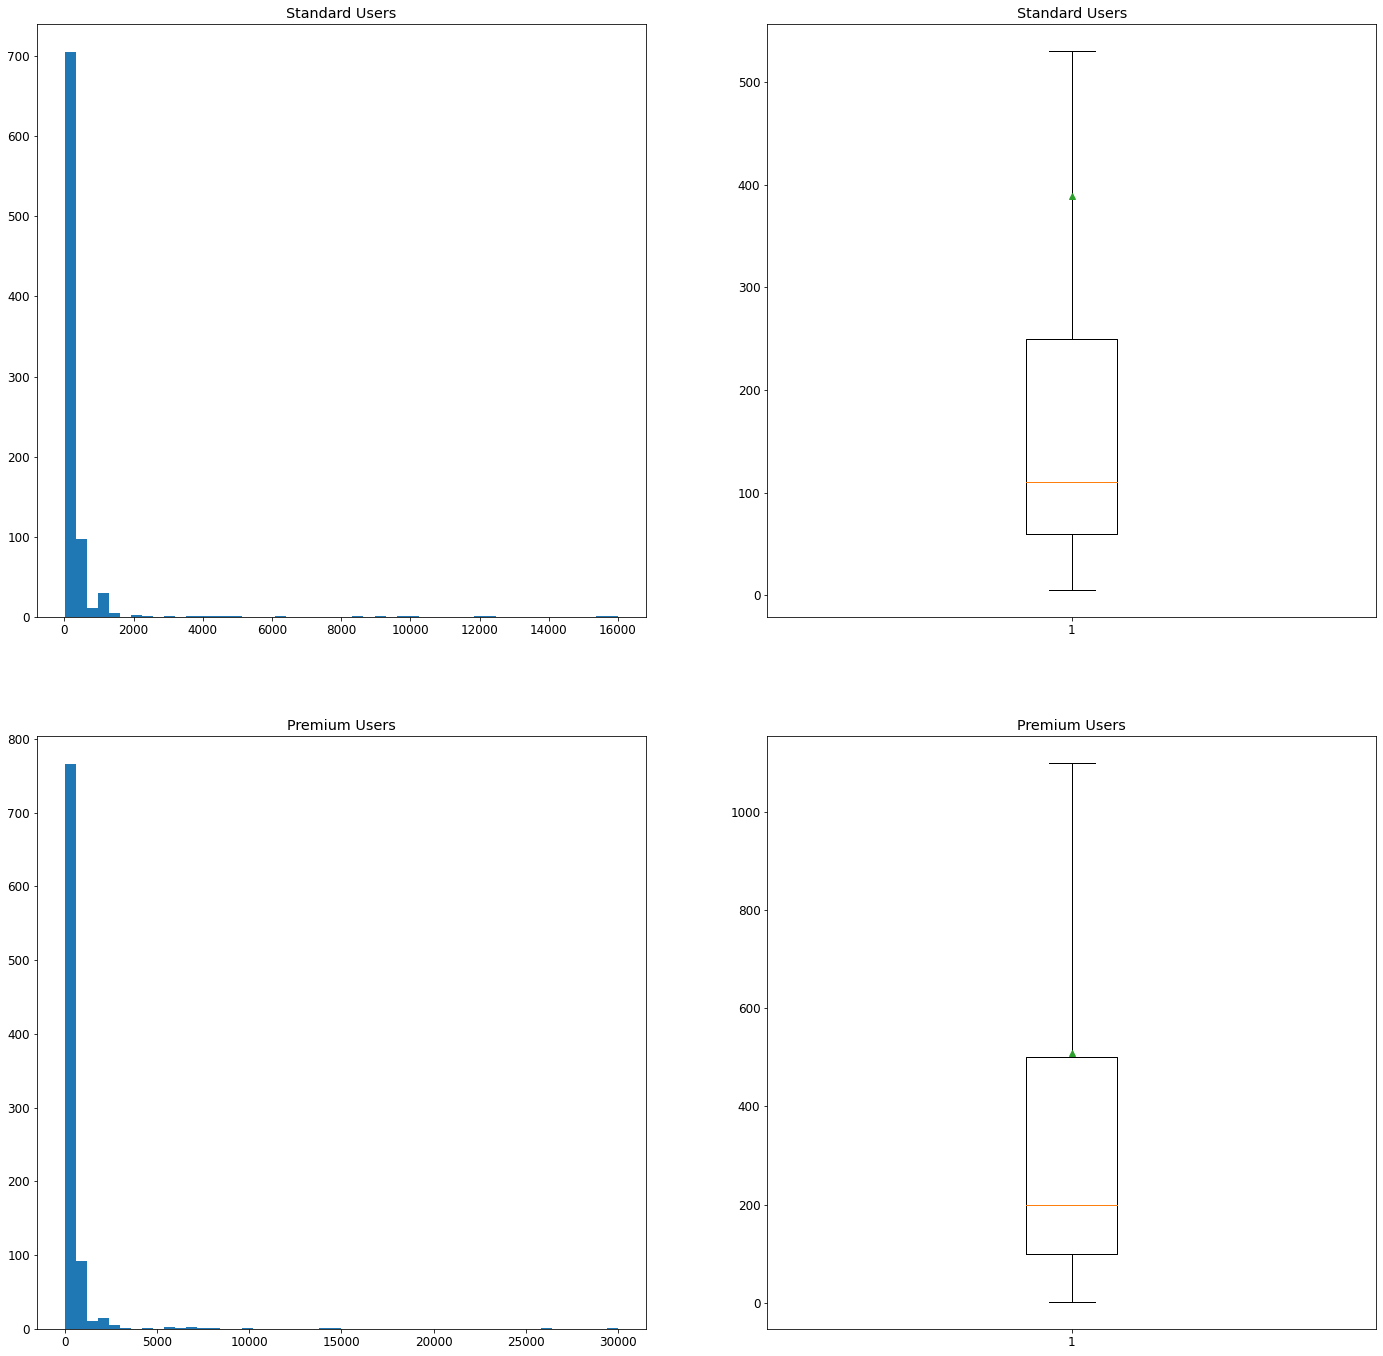

In [28]:
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2,2, figsize=(24, 24))

axs[0,0].set_title("Standard Users")
axs[0,0].hist(standard["balance"], bins=50)
axs[0,1].set_title("Standard Users")
axs[0,1].boxplot(standard["balance"], showfliers=False, showmeans=True)
axs[1,0].set_title("Premium Users")
axs[1,0].hist(premium["balance"], bins=50)
axs[1,1].set_title("Premium Users")
axs[1,1].boxplot(premium["balance"], showfliers=False, showmeans=True)
#axs[2,0].hist(elite["balance"], bins=20)
#axs[2,1].boxplot(elite["balance"])

plt.show()

In [17]:
plt.rcParams.update({'font.size': 22})

In [18]:
st_balances_less_outliers = standard[ standard["balance"] < 2000]
st_balances_greater_100 = st_balances_less_outliers[ st_balances_less_outliers["balance"] >= 100 ]
st_balances_less_100 = st_balances_less_outliers[ st_balances_less_outliers["balance"] < 100 ]

Below is a graph which shows every user in Standard's balance. The red line is the thereshold we recommended for people to start upgrading to premium.

The blue dots are members who should be in standard.

The green dots are members who should be in premium (or maybe even elite).

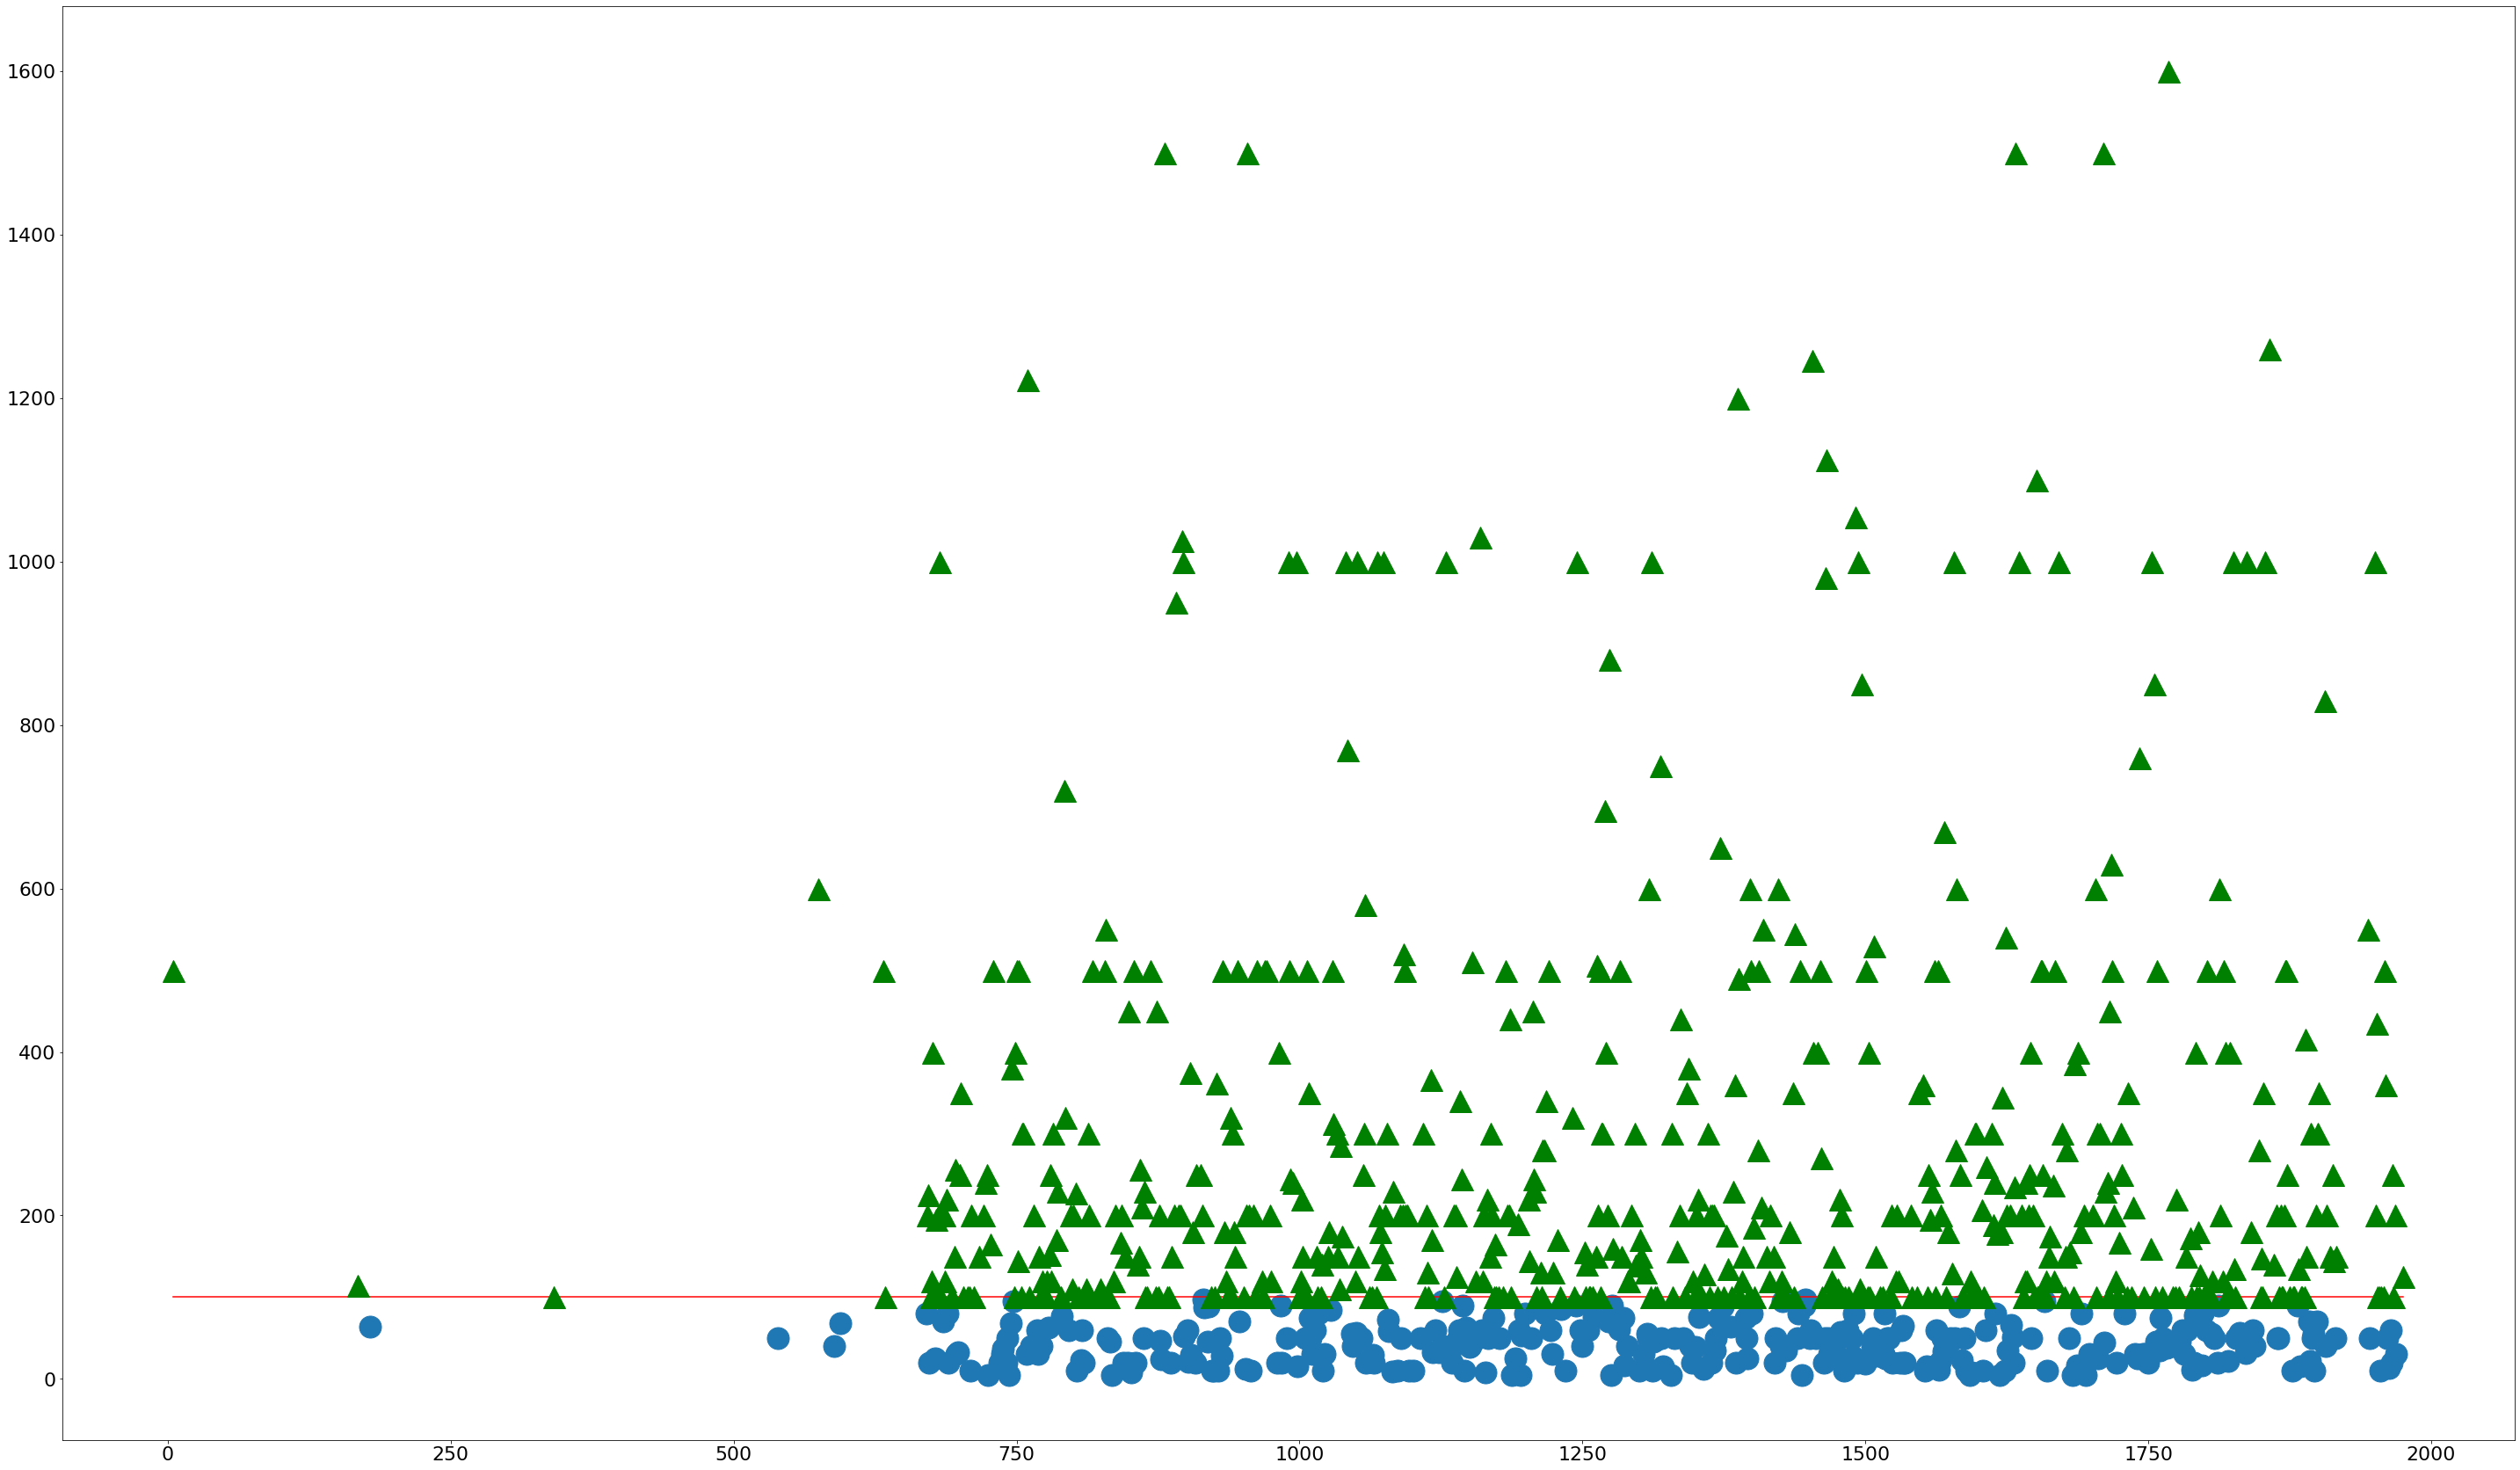

In [19]:
fig1 = plt.figure(figsize = (50, 30))
plt.plot(st_balances_less_100["balance"], "o",
         100*standard["balance"]/standard["balance"], 'r-',
         st_balances_greater_100["balance"], 'g^',
         markersize=25)
#lt.plot(100, color="red")
plt.show()

This % figure below is the % of users in this sample who are in Standard but should be in higher tiers.

In [20]:
# proportion of standard members in the wrong tier (balance > 100)
st_wrong_tier = len(st_balances_greater_100) / len(standard)
print(len(st_balances_greater_100))
print("{:.2f}%".format(100*st_wrong_tier))

553
63.34%


In [21]:
# average stake per point for standard members who are in the wrong tier
spp_st = np.mean(st_balances_greater_100["balance"]) / 100
print(spp_st)

2.89500904159132


For every point staked on average, elite members win 1.45 points.

Based on the average odds shortening, this means that premium and standard members win ~1.39 and ~1.37 points respectively.

Between **60 and 66 percent** of Standard members are in the **Wrong Tier**.

This is approximately **6,000** people.

This means on average, just on standard members, for *every single point staked* we are leaving approximately **€1389** in the bookies' pockets.

This here is the same process but for Premium members.

Same as above:

* Red line - recommended upgrade threshold
* Green triangles - balance too high for premium
* Blue dots - Balance ok for premium.

In [22]:
pr_balances_less_outliers = premium[ premium["balance"] < 5000]
pr_balances_greater_100 = pr_balances_less_outliers[ pr_balances_less_outliers["balance"] >= 750 ]
pr_balances_less_100 = pr_balances_less_outliers[ pr_balances_less_outliers["balance"] < 750 ]

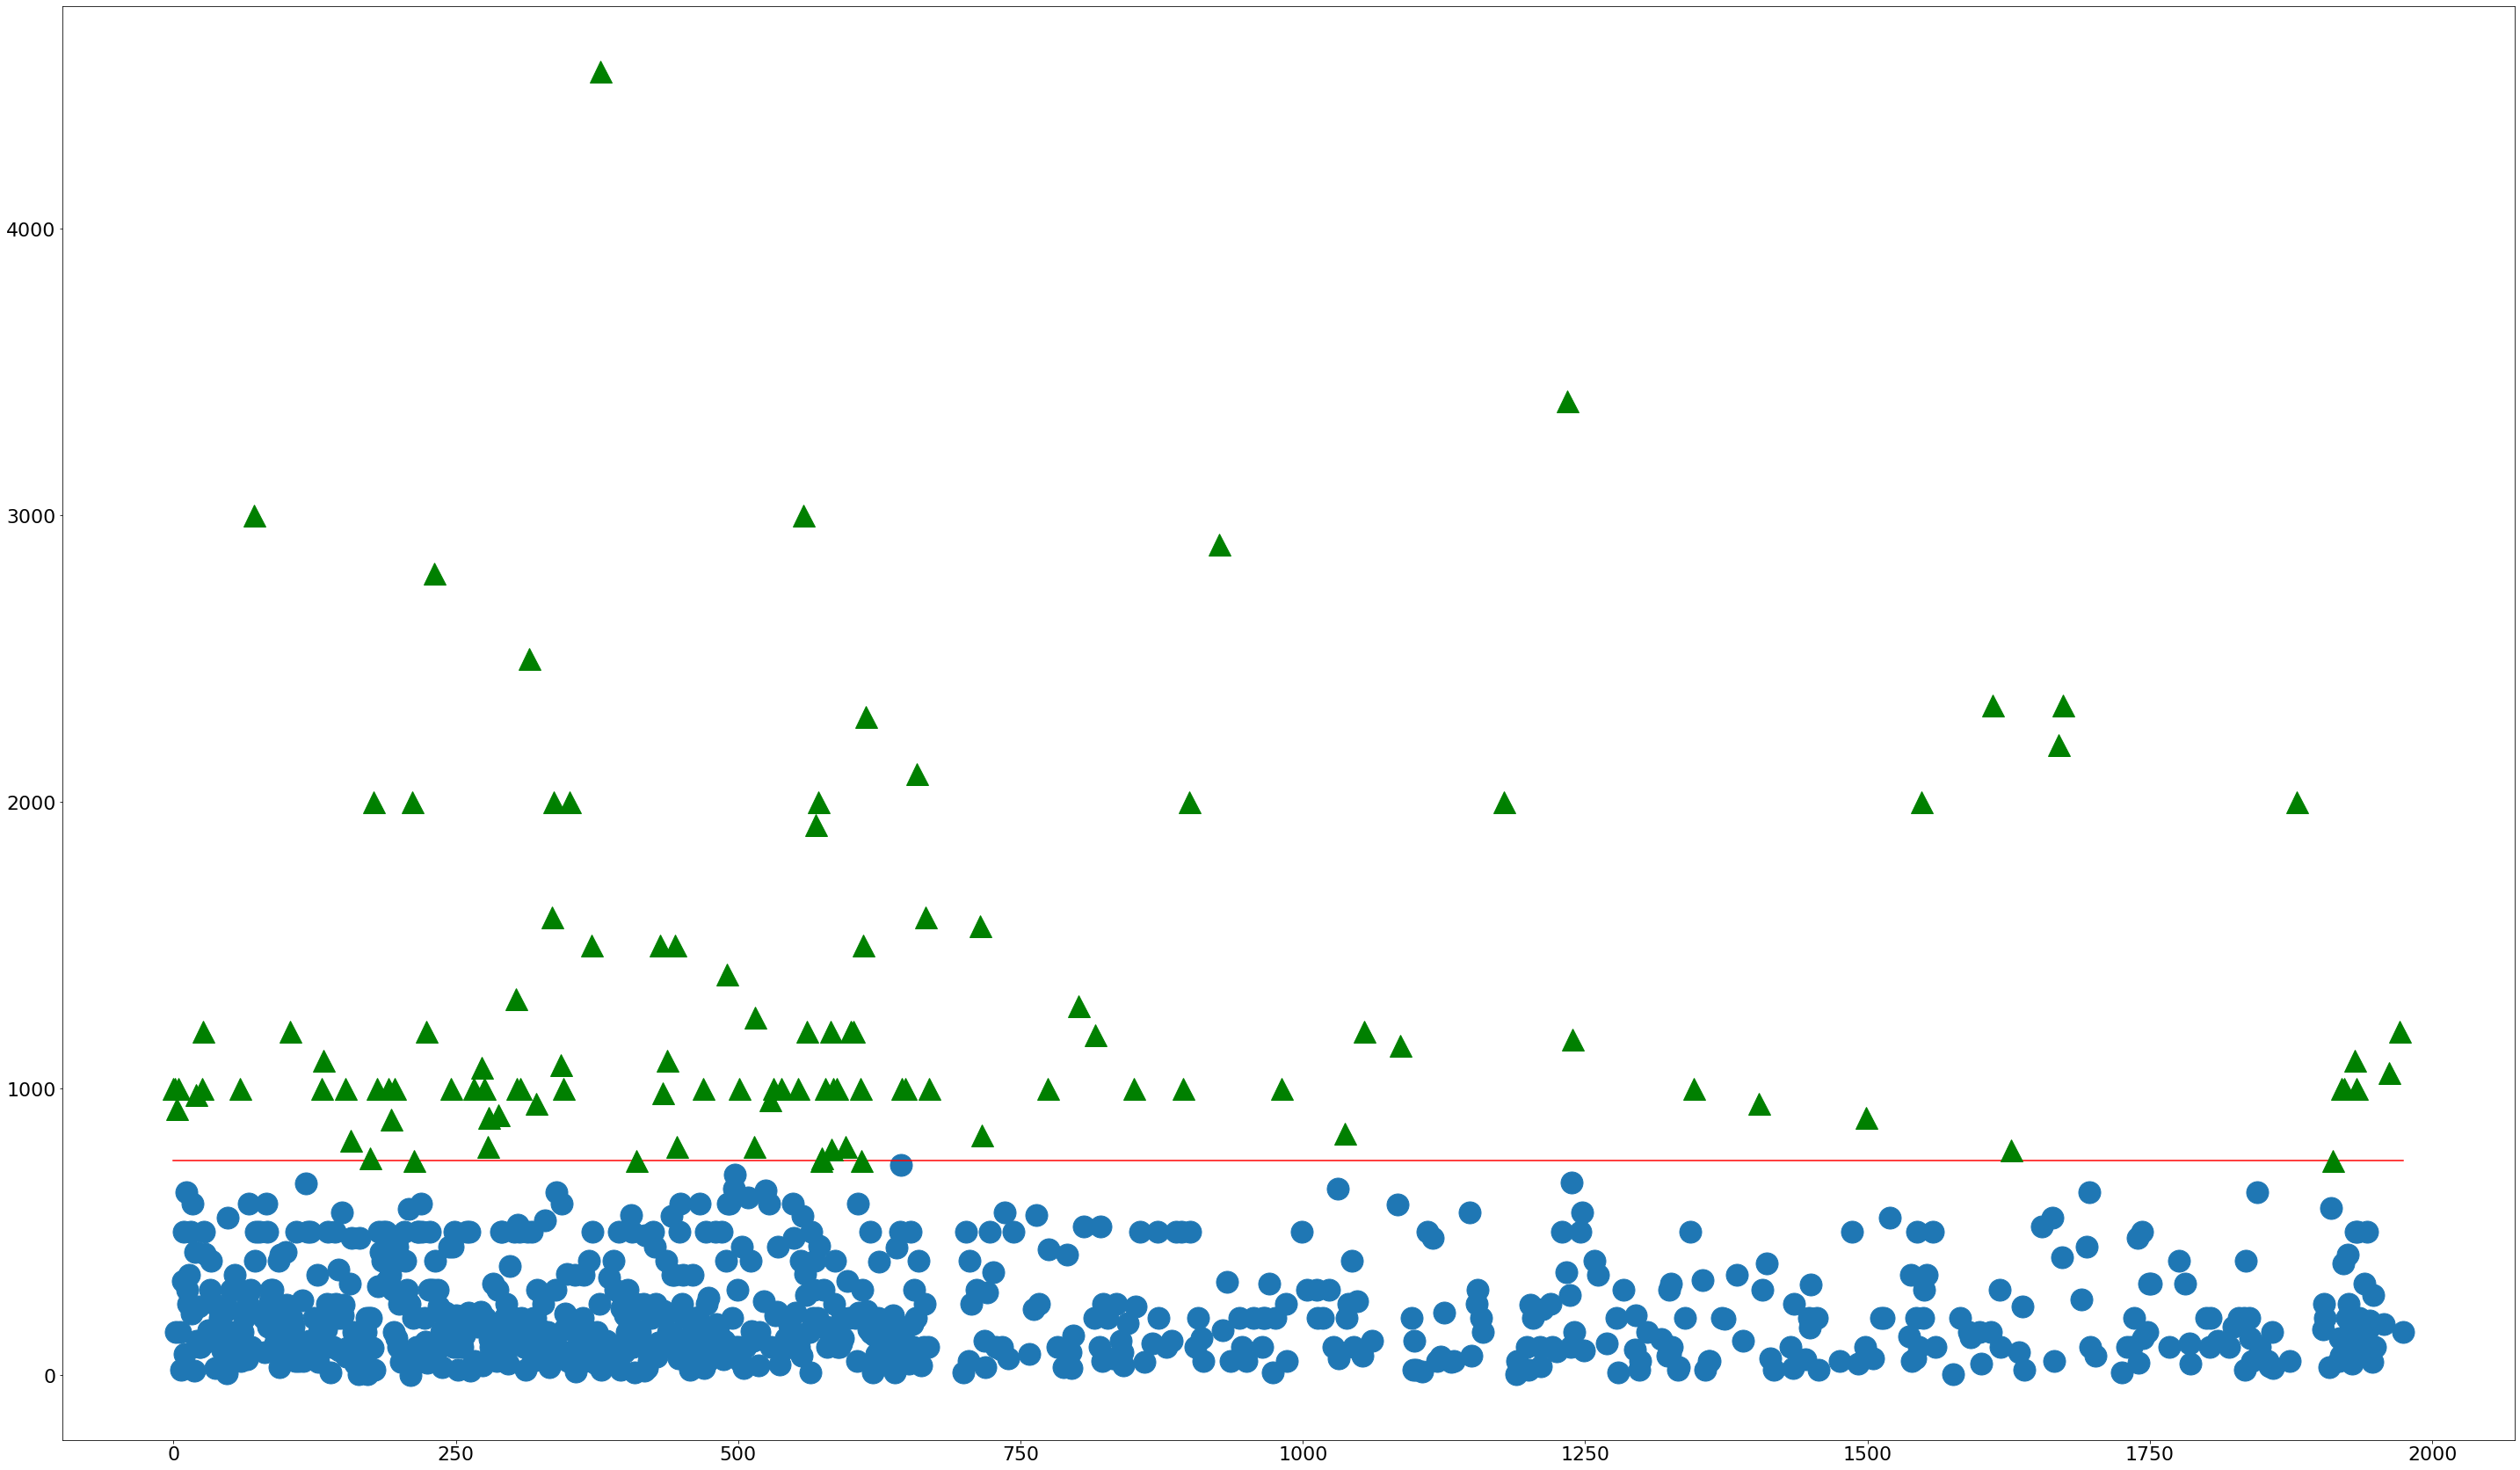

In [23]:
fig2 = plt.figure(figsize = (50, 30))
plt.plot(pr_balances_less_100["balance"], "o",
         750*premium["balance"]/premium["balance"], 'r-',
         pr_balances_greater_100["balance"], 'g^',
         markersize=25)
#lt.plot(100, color="red")
plt.show()

% of premium members who are in the wrong tier.

In [24]:
# proportion of premium members in the wrong tier (balance > 100)
pr_wrong_tier = len(pr_balances_greater_100) / len(premium)
print(len(pr_balances_greater_100))
print("{:.2f}%".format(100*pr_wrong_tier))

113
12.51%


In [25]:
spp_pr = np.mean(pr_balances_greater_100["balance"]) / 100
print(spp_pr)

13.106637168141592


Similarly here, 12.51% of this sample should be in Elite Tier

Roughly 10% to 14% of the actual group should be in Elite Tier.

This is roughly **200** people.

This is leaving roughly €157 in the bookies pockets for *every point staked.*

### Conclusion

Leakage to the Bookies:

* For every point staked: €1546
* Average Points staked on a betting day: 4.71
* Therefore on Average as a group, by not being in the correct tier, we are giving the bookies €7281 *every day*
* That's €2,657,805 for a year.

We need to start taking the money that should be ours.
We can't afford to let the bookies spend nearly **€3 million a year** on algorithms taht make life harder for us and prey on vulnerable people in society to ruin their lives. 

Simple as.